In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import scipy.fftpack as fp
from math import pi

In [30]:
f1=40; A1=0.9;
f2=60; A2=0.9;
f3=70; A3=1.5;
Fs=2500; 
Ts=2; 
t=np.linspace(0,Ts,Ts*Fs);
Sn=A1*np.sin(2*pi*f1*t)+A2*np.sin(2*pi*f2*t)+A3*np.sin(2*pi*f3*t); #сумма s+n
S=A1*np.sin(2*pi*f1*t) #+A2*np.sin(2*pi*f2*t); #s
Sf=fp.fft(S);

In [31]:
ft=30
fk=50
WDp = 2 * ft / Fs
WDs = 2 * fk / Fs
print(WDp, WDs)
d1=0.03
d2=0.01
rp= -20 * np.log10(1-d1)
rs= -20 * np.log10(d2)

0.024 0.04


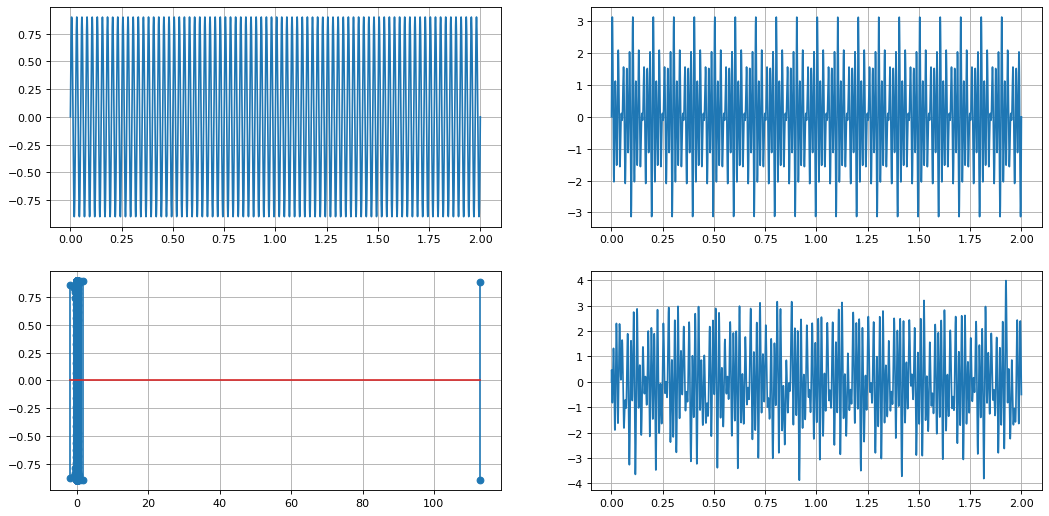

In [33]:


R1, WDn = signal.buttord(WDp,WDs,rp,rs) 
b, a = signal.butter(R1, WDn, btype='high')
z = signal.lfilter(b, a, Sn)

plt.figure(figsize=(16, 8), dpi=80)
plt.subplot(2, 2, 1)
plt.plot(t, S)
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, Sn)
plt.grid()

plt.subplot(2, 2, 3)
plt.stem(Sf, S, use_line_collection=True)
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t, z)
plt.grid()



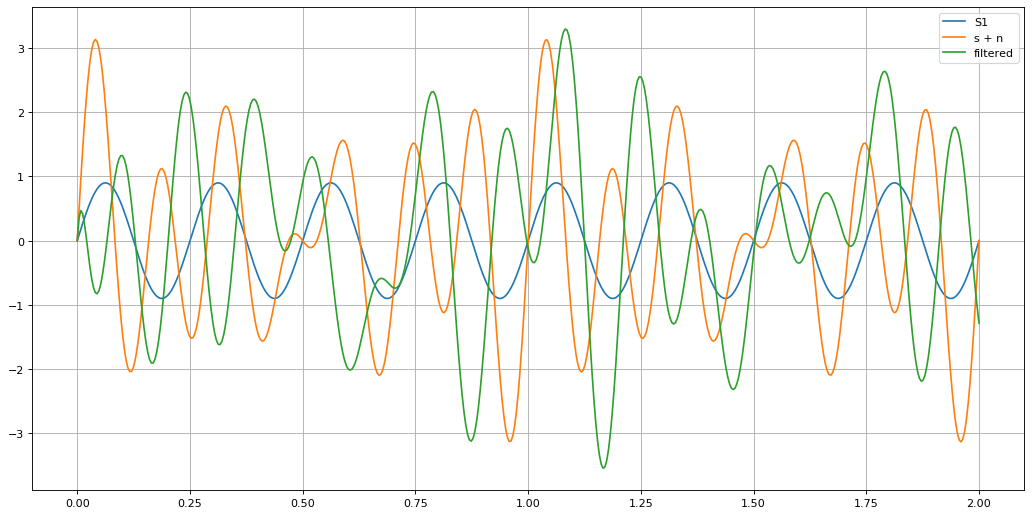

In [22]:
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(t, S)
plt.plot(t, Sn)
plt.plot(t, z)
plt.grid()
plt.legend(('S1', 's + n', 'filtered'))